# DIWALI SALES ANALYSIS 

# OBJECTIVE

 # IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# bringing in the datset for necessary analysis
df=pd.read_csv(r"C:\Users\HP\OneDrive\Pictures\Diwali Sales Dataanalyis.csv",encoding="unicode_escape")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1001088,Phan,P00354342,Male,0-17,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0,NaN,NaN
1,1001499,Caffey,P00338442,FeMale,0-17,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0,NaN,NaN
2,1000888,Liz,P00010742,FeMale,0-17,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0,NaN,NaN
3,1001434,Steven,P00265242,FeMale,0-17,12,TEEN,Unmarried,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0,NaN,NaN
4,1000866,Dartt,P00035542,FeMale,0-17,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1001176,Alice,P00128942,Male,55+,92,SENIOR,Unmarried,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16805.0,NaN,NaN
11247,1005658,Poirier,P00227942,Male,55+,92,SENIOR,Unmarried,Karnataka,Southern,Aviation,Footwear & Shoes,1,12865.0,NaN,NaN
11248,1002204,Dilbeck,P00246642,Male,55+,92,SENIOR,Unmarried,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,3,12383.0,NaN,NaN
11249,1000928,Hemant,P00134342,Male,55+,92,SENIOR,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,4139.0,NaN,NaN


In [51]:
df.shape # number of rows and columns 

(11251, 13)

In [4]:
#checking the datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Age Group.1       11251 non-null  object 
 7   Marital_Status    11251 non-null  object 
 8   State             11251 non-null  object 
 9   Zone              11251 non-null  object 
 10  Occupation        11251 non-null  object 
 11  Product_Category  11251 non-null  object 
 12  Orders            11251 non-null  int64  
 13  Amount            11239 non-null  float64
 14  Status            0 non-null      float64
 15  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(10)
memo

In [5]:
df=df.drop(columns=["Status","unnamed1"])


In [6]:
df # here we have dropped the unwanted columns from the datset hence our datset looks clean now lets perform some further analysis

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,0-17,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,0-17,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,0-17,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0
3,1001434,Steven,P00265242,FeMale,0-17,12,TEEN,Unmarried,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0
4,1000866,Dartt,P00035542,FeMale,0-17,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1001176,Alice,P00128942,Male,55+,92,SENIOR,Unmarried,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16805.0
11247,1005658,Poirier,P00227942,Male,55+,92,SENIOR,Unmarried,Karnataka,Southern,Aviation,Footwear & Shoes,1,12865.0
11248,1002204,Dilbeck,P00246642,Male,55+,92,SENIOR,Unmarried,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,3,12383.0
11249,1000928,Hemant,P00134342,Male,55+,92,SENIOR,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,4139.0


In [7]:
# in our datset we have two age group columns we will remove the one who is classified based on the numbers
df.drop(columns="Age Group",inplace=True)

In [8]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0
3,1001434,Steven,P00265242,FeMale,12,TEEN,Unmarried,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0
4,1000866,Dartt,P00035542,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1001176,Alice,P00128942,Male,92,SENIOR,Unmarried,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16805.0
11247,1005658,Poirier,P00227942,Male,92,SENIOR,Unmarried,Karnataka,Southern,Aviation,Footwear & Shoes,1,12865.0
11248,1002204,Dilbeck,P00246642,Male,92,SENIOR,Unmarried,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,3,12383.0
11249,1000928,Hemant,P00134342,Male,92,SENIOR,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,4139.0


# now cleaning have been done in the datset now we will do further analysis and based on that we will draw visualizations to cover insights from data

In [82]:
# first of al we will check the total number of males and females in our dataset
v=df["Gender"].value_counts() #in order to display the total count we willl segregate the data and take it into a new data frame
v

Gender
FeMale    7842
Male      3409
Name: count, dtype: int64

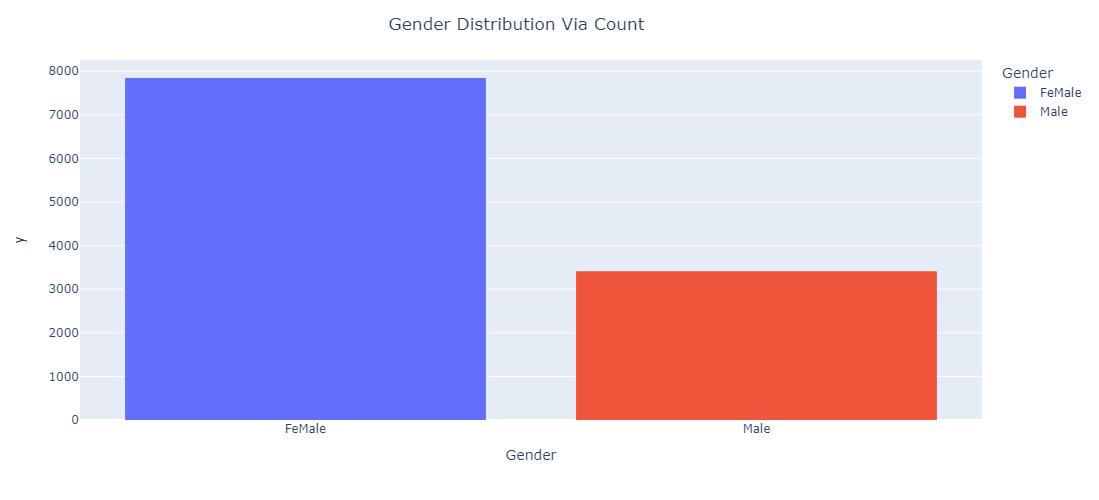

In [81]:
# from above and below visulization we can see that the females are more than male
fig=px.bar(v,x=v.index,y=v.values,color=v.index )
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(title="Gender Distribution Via Count"
                  ,title_x=0.47,height=500,width=500)
fig.show() # 

In [9]:
# lets see the  sales via category ,meaning which product has been sold , what are the total sales

In [10]:
sales=df.groupby("Product_Category").Amount.sum().sort_values()
sales

Product_Category
Office                      81936.00
Veterinary                 112702.00
Hand & Power Tools         405618.00
Pet Care                   482277.00
Decor                      730360.00
Books                     1061478.00
Tupperware                1155642.00
Household items           1569337.00
Stationery                1676051.50
Auto                      1958609.99
Beauty                    1959484.00
Sports Products           3635933.00
Games & Toys              4331694.00
Furniture                 5440051.99
Footwear & Shoes         15575209.45
Electronics & Gadgets    15643846.00
Clothing & Apparel       16495019.00
Food                     33933883.50
Name: Amount, dtype: float64

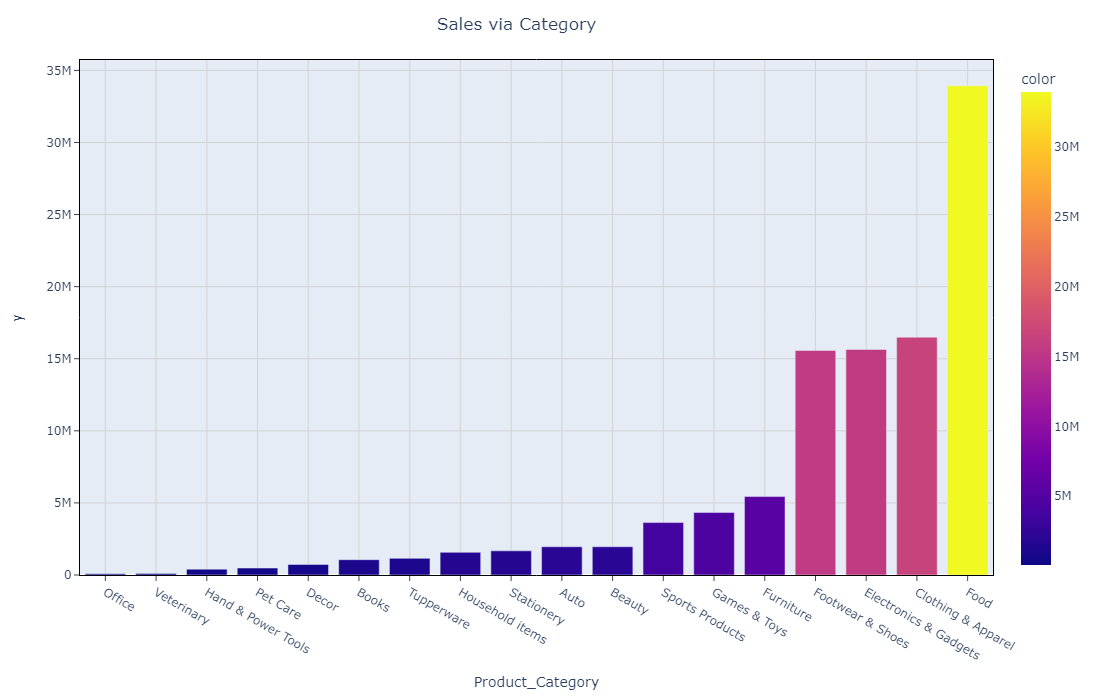

In [85]:
fig=px.bar(sales, y=sales.values,x=sales.index,color=sales.values)
fig.update_layout(height=700,title=" Sales via Category ",title_x=0.47)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

In [12]:
ord=df.groupby("Product_Category").Orders.sum().sort_values()
ord

Product_Category
Hand & Power Tools         80
Tupperware                166
Veterinary                206
Decor                     235
Books                     245
Auto                      246
Office                    261
Stationery                281
Pet Care                  536
Sports Products           870
Furniture                 890
Games & Toys              940
Beauty                   1086
Household items          1331
Footwear & Shoes         2654
Electronics & Gadgets    5226
Food                     6120
Clothing & Apparel       6634
Name: Orders, dtype: int64

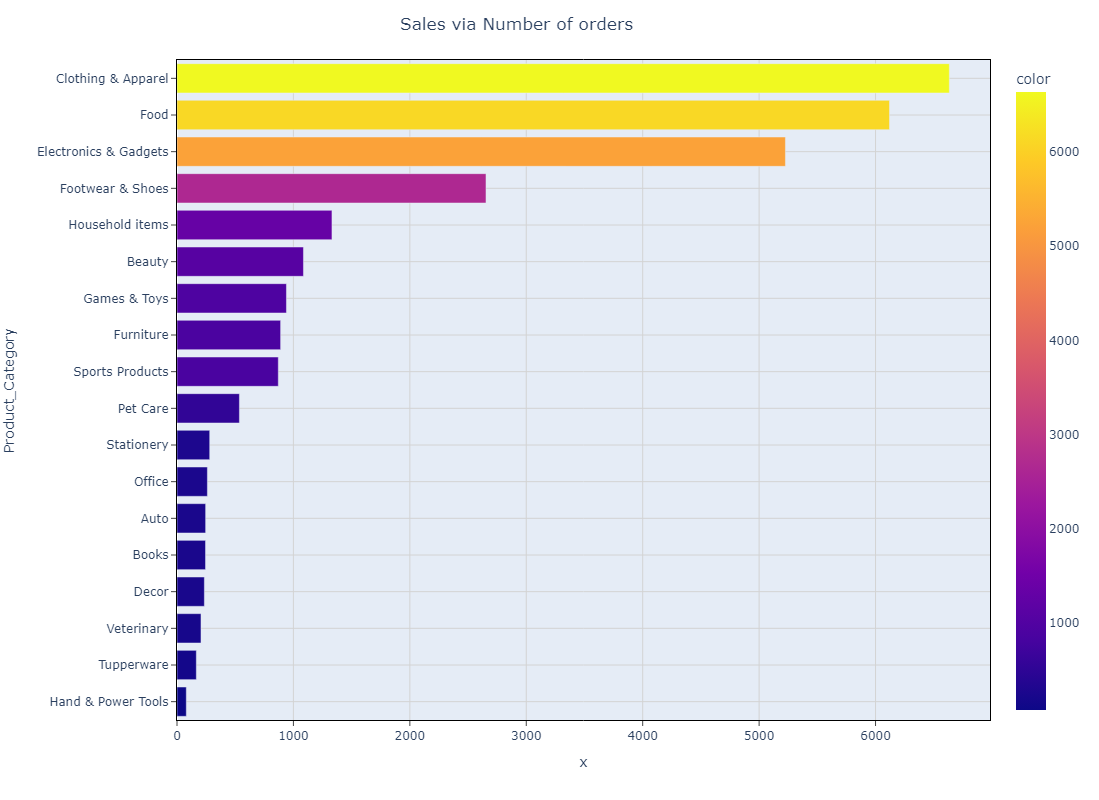

In [13]:
# lets take a look at the orders via category
fig=px.bar(ord,y=ord.index,x=ord.values,color=ord.values)
fig.update_layout(height=800,title="Sales via Number of orders",title_x=0.47)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

# from the above visualization we can draw that the highest numbers of orders has been placed for clothing and apparel while the lowest are hand and power tools

#lets see how much sales are happening in each state via category of the product from there we will describe that from which state we are recieving most sales and we also look dor orders state wise

In [14]:
df
 # viewing the database

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0
3,1001434,Steven,P00265242,FeMale,12,TEEN,Unmarried,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0
4,1000866,Dartt,P00035542,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1001176,Alice,P00128942,Male,92,SENIOR,Unmarried,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16805.0
11247,1005658,Poirier,P00227942,Male,92,SENIOR,Unmarried,Karnataka,Southern,Aviation,Footwear & Shoes,1,12865.0
11248,1002204,Dilbeck,P00246642,Male,92,SENIOR,Unmarried,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,3,12383.0
11249,1000928,Hemant,P00134342,Male,92,SENIOR,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,4139.0


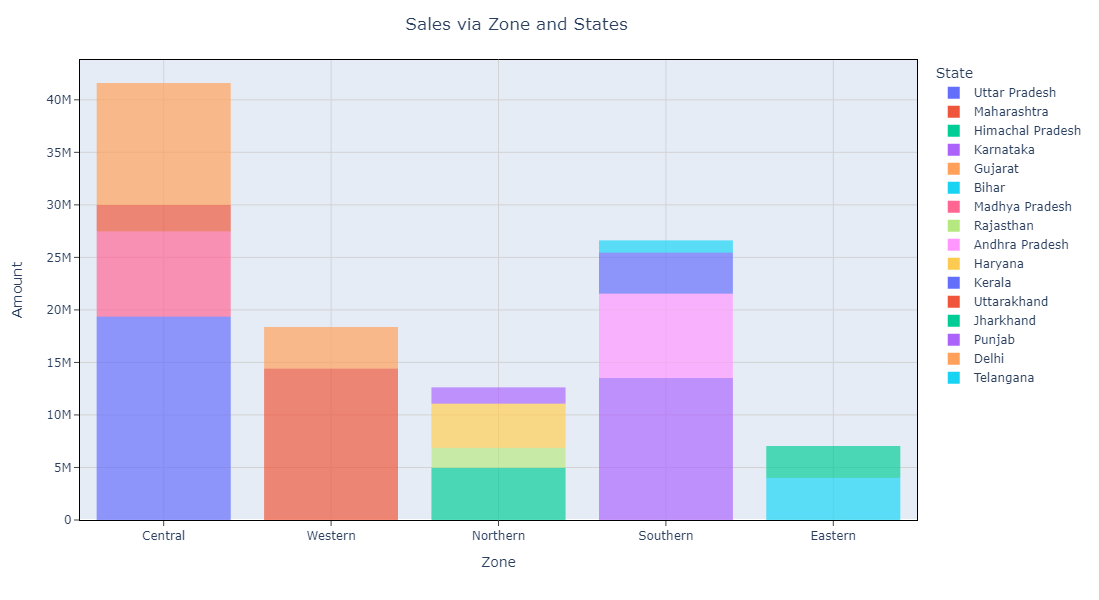

In [56]:
fig=px.bar(df,x="Zone",y="Amount",color="State")
fig.update_layout(title="Sales via Zone and States",title_x=0.47,height=600,width=1000)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_traces(dict(marker_line_width=0))
fig.show()

# from the above analysis we are able to determine which zone has maximum number of sales and in that zones what are states involved
#central region has the highest sale while the sales in eastern region are low 

In [16]:
#lets see which gender is ordering and contributing to more sales male or females

In [17]:
# now in above i want to see that which gender is contributing to maximum sales in both  central and eastern region and we will also see that which age group is contributing to maximum sales 

In [18]:
# for the analysis we will segreate the data inorder to carry the analysis
central=df.loc[df.Zone=="Central"]
central

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
4,1000866,Dartt,P00035542,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0
6,1002236,Sharda,P00364242,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,IT Sector,Food,1,15624.0
10,1001280,Utsav,P00249142,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Chemical,Food,2,11722.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,1003036,Prescott,P00255842,FeMale,92,SENIOR,Unmarried,Uttarakhand,Central,Chemical,Furniture,2,20239.0
11245,1002526,Shreya,P00271142,Male,92,SENIOR,married,Uttar Pradesh,Central,Banking,Food,2,19457.0
11246,1001176,Alice,P00128942,Male,92,SENIOR,Unmarried,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16805.0
11248,1002204,Dilbeck,P00246642,Male,92,SENIOR,Unmarried,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,3,12383.0


In [19]:
pie=central.groupby('Gender').Amount.sum() # we can see that females in central region are contributing more we will also check that on which products female are spending the most

In [20]:
pie # stored the above result in pie and displaed

Gender
FeMale    28820668.45
Male      12780205.00
Name: Amount, dtype: float64

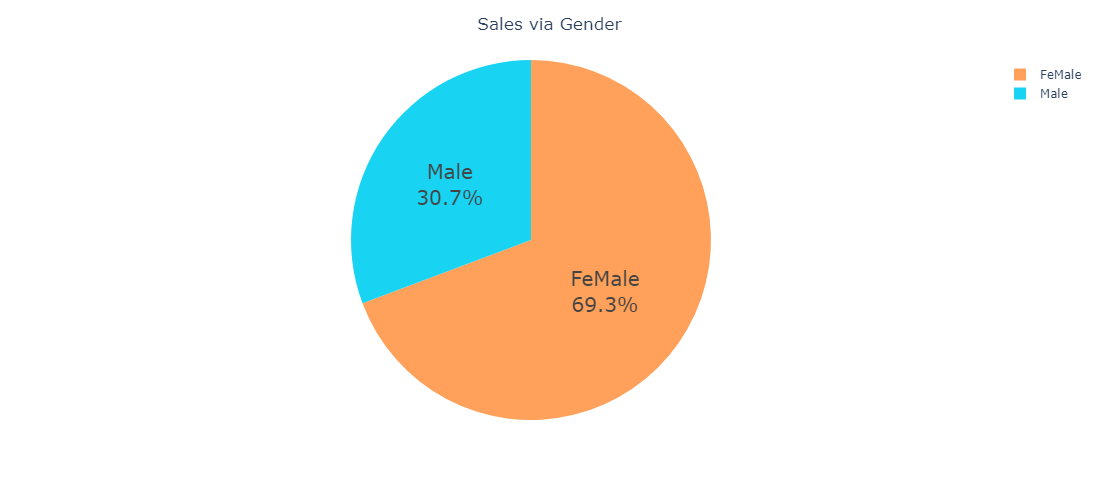

In [94]:
fig=px.pie(pie,names=pie.index,values=pie.values,color=pie.values
           ,color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'lightcyan'})
fig.update_layout(title="Sales via Gender"
                  ,title_x=0.5)
fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.update_traces(hoverinfo="label",textinfo=
                  'label+percent',
                  textfont_size=20)
fig.show()

In [22]:
# we will see that in the central region which female under which age group is contributing

In [23]:
fem_gr=central[central.Gender=="FeMale"]
fem_gr

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
4,1000866,Dartt,P00035542,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0
6,1002236,Sharda,P00364242,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,IT Sector,Food,1,15624.0
10,1001280,Utsav,P00249142,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Chemical,Food,2,11722.0
14,1001220,Nelson,P00103042,FeMale,12,TEEN,married,Madhya Pradesh,Central,Govt,Games & Toys,3,10051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,1004738,Stefanie,P00233542,FeMale,90,SENIOR,Unmarried,Uttar Pradesh,Central,Aviation,Clothing & Apparel,2,7122.0
11233,1005431,Sample,P00154742,FeMale,90,SENIOR,Unmarried,Uttar Pradesh,Central,Healthcare,Clothing & Apparel,2,1736.0
11234,1004083,Randy,P00119642,FeMale,90,SENIOR,married,Uttar Pradesh,Central,Chemical,Clothing & Apparel,2,1735.0
11240,1000356,Nirja,P00181842,FeMale,91,SENIOR,Unmarried,Delhi,Central,Chemical,Food,1,3971.0


In [24]:
ag=fem_gr.groupby("Age Group.1").Amount.sum() # storing the filtered data int the ag varible to plot visualization

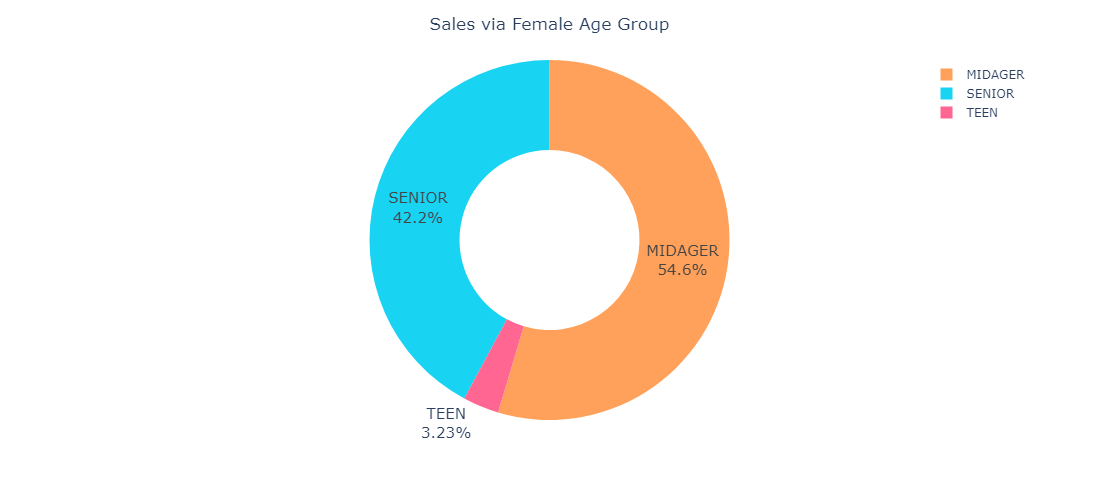

In [88]:
fig=px.pie(ag,names=ag.index,values=ag.values,color=ag.values,hole=0.5
           ,color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'lightcyan'})
fig.update_layout(title="Sales via Female Age Group"
                  ,title_x=0.5)
fig.update_layout(
    autosize=False,
    width=600,
    height=500
)
fig.update_traces(hoverinfo="label",textinfo=
                  'label+percent',
                  textfont_size=15)
fig.show()

from above we can conclude that midager and teenager are contributing more in sales of products during the festive activites

# now we will see that which age group is contributing for low sales and high sales in the lowest selling regions

In [26]:
df.head(5) # we have seen that the eastern region has loest sales and hence we will what age group we should focus on more

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0
3,1001434,Steven,P00265242,FeMale,12,TEEN,Unmarried,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0
4,1000866,Dartt,P00035542,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Healthcare,Food,4,15880.0


In [27]:
east=df.loc[df["Zone"]=="Eastern"] # segregating the data of the eastern regions for analysis from the dataset
east.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11,1001296,Nunn,P00364842,FeMale,12,TEEN,Unmarried,Bihar,Eastern,Healthcare,Food,1,11595.0
35,1005840,Glassco,P00266642,Male,12,TEEN,Unmarried,Jharkhand,Eastern,Retail,Clothing & Apparel,3,5414.0
37,1003594,Myrick,P00194442,FeMale,12,TEEN,Unmarried,Jharkhand,Eastern,Healthcare,Clothing & Apparel,3,5396.0
39,1004102,Cousins,P00233142,FeMale,12,TEEN,married,Bihar,Eastern,Media,Clothing & Apparel,3,5211.0
40,1000580,Maxwell,P00335842,Male,12,TEEN,Unmarried,Bihar,Eastern,Healthcare,Clothing & Apparel,2,5208.0


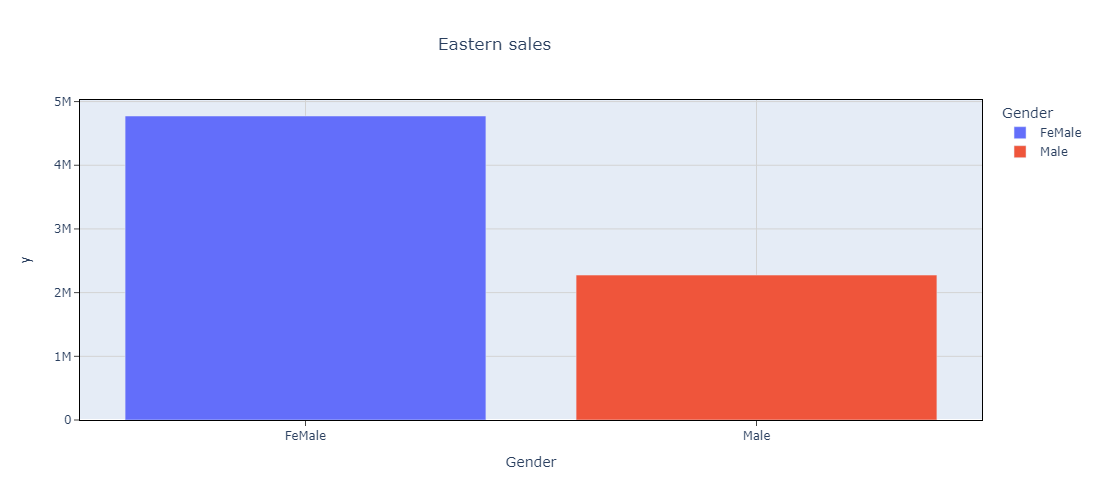

In [49]:
v=east.groupby("Gender").Amount.sum() # we can see that males are respomsible for low saindexles in this region
fig=px.bar(v,x=v.index,y=v.values,title="Eastern sales",color=v.index)
fig.update_layout(title_x=0.45,height=500,width=600)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

# From the above visualization we can see that males are buying almost half compared to womens now we will see that in males which age group is responsible for low sales in easterm region and that too in male category

In [29]:
ml=east[east.Gender=="Male"] # segregating male data fromth eeastern region for analysis of each age group
ml

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
35,1005840,Glassco,P00266642,Male,12,TEEN,Unmarried,Jharkhand,Eastern,Retail,Clothing & Apparel,3,5414.0
40,1000580,Maxwell,P00335842,Male,12,TEEN,Unmarried,Bihar,Eastern,Healthcare,Clothing & Apparel,2,5208.0
86,1005777,Laura,P00125142,Male,13,TEEN,married,Jharkhand,Eastern,Construction,Electronics & Gadgets,2,5996.0
110,1001978,Sathya,P00034742,Male,14,TEEN,Unmarried,Bihar,Eastern,Hospitality,Sports Products,3,13495.0
133,1001366,Muhammed,P00296042,Male,14,TEEN,Unmarried,Jharkhand,Eastern,Construction,Pet Care,1,2130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11002,1002293,Molinari,P00120542,Male,70,SENIOR,married,Bihar,Eastern,Banking,Clothing & Apparel,1,5342.0
11044,1002092,Shivangi,P00288942,Male,75,SENIOR,Unmarried,Bihar,Eastern,Lawyer,Footwear & Shoes,3,16264.0
11067,1003592,Hooks,P00331042,Male,76,SENIOR,married,Bihar,Eastern,Food Processing,Electronics & Gadgets,2,7856.0
11214,1005146,Sumrall,P00270242,Male,89,SENIOR,married,Jharkhand,Eastern,Automobile,Footwear & Shoes,4,8807.0


In [30]:
ml.groupby("Age Group.1").Amount.sum()

Age Group.1
MIDAGER    1122386.0
SENIOR      958041.0
TEEN        195230.0
Name: Amount, dtype: float64

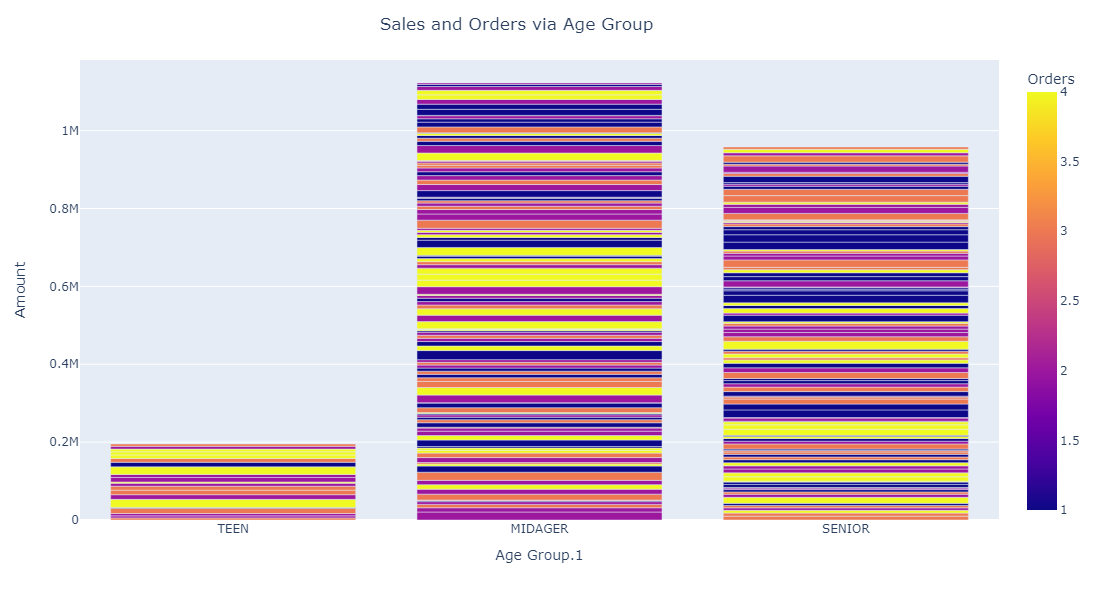

In [31]:
fig=px.bar(ml,x="Age Group.1",y='Amount',color="Orders")
fig.update_layout(title="Sales and Orders via Age Group",title_x=0.47,height=600,width=800)
fig.show()

# from the above analysis we can see that teens are buying less while mid ager are contributing most in sales therefore areas of concern are teens or little ones

-----------------------------------------------

# Now we will check our sales and orders based on occupation and marital status of our employees


In [32]:
df.head(3) # calling the dataframe for refrence


,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0


In [33]:
df["Occupation"].unique()

array(['Aviation', 'IT Sector', 'Textile', 'Healthcare', 'Govt', 'Retail',
       'Media', 'Chemical', 'Lawyer', 'Automobile', 'Banking',
       'Hospitality', 'Agriculture', 'Construction', 'Food Processing'],
      dtype=object)

# lets see which sector is contributing to maximum sales

In [34]:
v=df.groupby("Occupation").Amount.sum()# segregating the data from the dataframe and storing it in another variable
v

Occupation
Agriculture         2593087.00
Automobile          5368596.00
Aviation           12602298.00
Banking            10770610.95
Chemical            5297436.00
Construction        3597511.00
Food Processing     4070670.00
Govt                8517212.00
Healthcare         13034587.49
Hospitality         6376405.00
IT Sector          14755079.00
Lawyer              4981665.00
Media               6295832.99
Retail              4783170.00
Textile             3204972.00
Name: Amount, dtype: float64

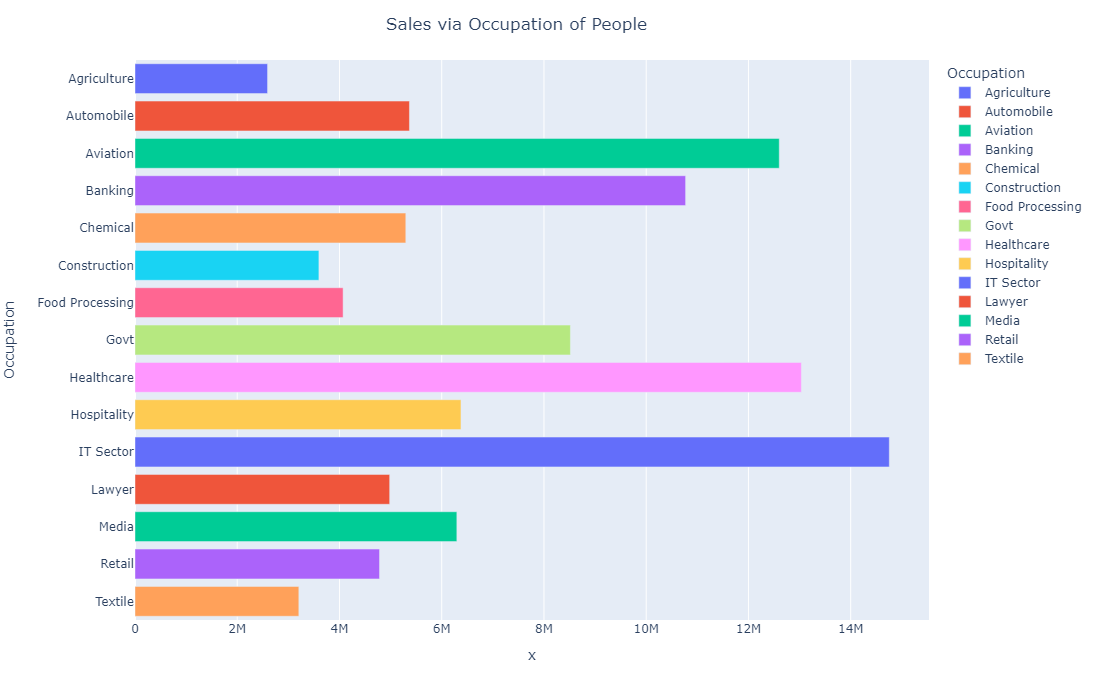

In [35]:
fig=px.bar(v,y=v.index,x=v.values,color=v.index)
fig.update_layout(height=700,width=900,
                  title="Sales via Occupation of People"
                  ,title_x=0.47)
fig.show()

In [36]:
# from above visual we can see tht it sector is majorly contributing in the sales during festivities while the lowest sales haa been seen by the people with agricultural occupation

 #we will analyse the marital status and sales and order by them during festive seasons

In [37]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age,Age Group.1,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1001088,Phan,P00354342,Male,12,TEEN,married,Uttar Pradesh,Central,Aviation,Furniture,2,20058.0
1,1001499,Caffey,P00338442,FeMale,12,TEEN,Unmarried,Uttar Pradesh,Central,Aviation,Furniture,2,19991.0
2,1000888,Liz,P00010742,FeMale,12,TEEN,Unmarried,Maharashtra,Western,IT Sector,Food,2,19284.0


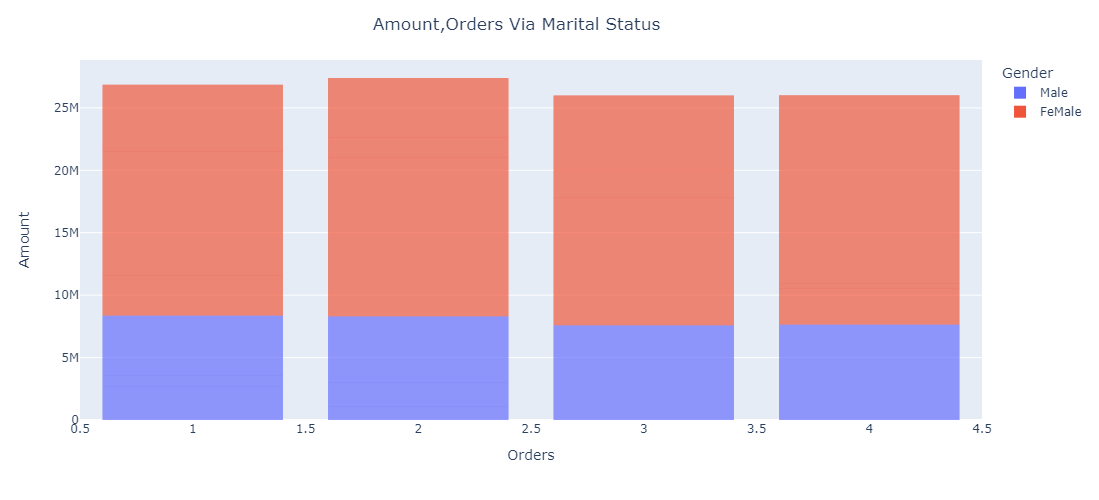

In [84]:
fig=px.bar(df,x="Orders",y="Amount",color="Gender")
fig.update_layout(title ="Amount,Orders Via Marital Status",
                  title_x=.47,height=500,width=900
                 )
fig.update_traces(dict(marker_line_width=0))
fig.show()

# Conclusion